<a href="https://colab.research.google.com/github/cahyogadhang/cahyogadhang-2025-KECERDASAN-BUATAN-TI-1B/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UJIAN TENGAH SEMESTER KECERDASAN BUATAN


Nama:    Cahyo Gadhang Putro Baskoro

NIM:     4.33.24.1.05

Kelas:   TI-1B

Tanggal: 23 Mei 2025

# Analisis Data Airbnb NYC 2019


## Import Library dan Load DataSet

In [ ]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
df = pd.read_csv('airbnb.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Eksplorasi Data Awal

1. Lihat struktur data (jumlah kolom, tipe, non-null)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

2. Statistik deskriptif untuk kolom numerik

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


3. Cek jumlah missing values per kolom

In [ ]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


4. Cek tipe data tiap kolom

In [ ]:
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


5. Statistik khusus untuk kolom 'price'

In [ ]:
df['price'].describe()

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


## Data Cleaning

In [ ]:
df = df[df['price'] > 0]
df = df[df['price'] <= 1000]
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df = df[df['price'].notna() & df['minimum_nights'].notna()]
df = df.drop(columns=['last_review'])
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## Data Manipulation

Kategori Harga

In [ ]:
def categorize_price(p):
    if p < 100:
        return 'Murah'
    elif p < 300:
        return 'Sedang'
    else:
        return 'Mahal'

df['kategori_harga'] = df['price'].apply(categorize_price)

# Lihat hasil kategori
df[['price', 'kategori_harga']].head()

,price,kategori_harga
0,149,Sedang
1,225,Sedang
2,150,Sedang
3,89,Murah
4,80,Murah


Kategori Ketersediaan

In [ ]:
def kategori_ketersediaan(a):
    if a == 0:
        return 'Tidak tersedia'
    elif a < 100:
        return 'Rendah'
    elif a < 300:
        return 'Sedang'
    else:
        return 'Tinggi'

df['kategori_ketersediaan'] = df['availability_365'].apply(kategori_ketersediaan)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,kategori_ketersediaan,populer,total_price,harga_per_malam,kategori_harga
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,Tinggi,Biasa,149.0,149.0,Sedang
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,Tinggi,Biasa,225.0,225.0,Sedang
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,Tinggi,Biasa,450.0,150.0,Sedang
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,Sedang,Populer,89.0,89.0,Murah
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,Tidak tersedia,Biasa,800.0,80.0,Murah


## Analisis Deskriptif

In [ ]:
# Statistik umum
print("Statistik Umum:\n", df.describe())

# Distribusi room_type
print("\nDistribusi Tipe Ruangan:\n", df['room_type'].value_counts())

# Rata-rata harga per room_type
print("\nRata-rata Harga / Room Type:\n", df.groupby('room_type')['price'].mean())

# Rata-rata harga per wilayah
print("\nRata-rata Harga / Wilayah:\n", df.groupby('neighbourhood_group')['price'].mean())

# Jumlah listing per wilayah
print("\nJumlah Listing per Wilayah:\n", df['neighbourhood_group'].value_counts())

# Host terbanyak
print("\nTop 5 Host dengan Listing Terbanyak:\n", df['host_id'].value_counts().head(5))

# Listing dengan review terbanyak
print("\nListing dengan Review Terbanyak:\n", df.sort_values('number_of_reviews', ascending=False)[['name', 'number_of_reviews']].head(5))

# Korelasi antar variabel
print("\nKorelasi:\n", df[['price', 'number_of_reviews', 'availability_365']].corr())

Statistik Umum:
                  id       host_id      latitude     longitude         price  \
count  4.864500e+04  4.864500e+04  48645.000000  48645.000000  48645.000000   
mean   1.901669e+07  6.761441e+07     40.728938    -73.952052    141.311789   
std    1.097991e+07  7.860040e+07      0.054570      0.046167    116.731330   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420     10.000000   
25%    9.473889e+06  7.825587e+06     40.690020    -73.982980     69.000000   
50%    1.967448e+07  3.081216e+07     40.722970    -73.955600    105.000000   
75%    2.914483e+07  1.074344e+08     40.763130    -73.936130    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990   1000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48645.000000       48645.000000       48645.000000   
mean         6.973461          23.354836           1.094562   
std         20.267263          44.631191           1.599409   
min          1.0000

## Visualisasi Data

Visualisasi Distribusi Harga

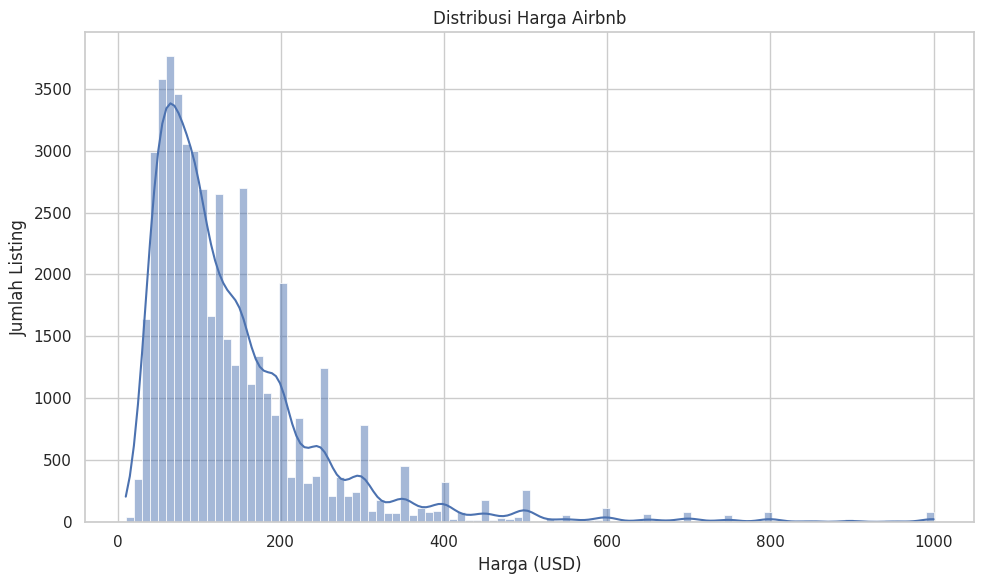

In [ ]:
# Visualisasi Distribusi Harga
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=100, kde=True)
plt.title("Distribusi Harga Airbnb")
plt.xlabel("Harga (USD)")
plt.ylabel("Jumlah Listing")
plt.tight_layout()
plt.show()

Jumlah Properti per Wilayah

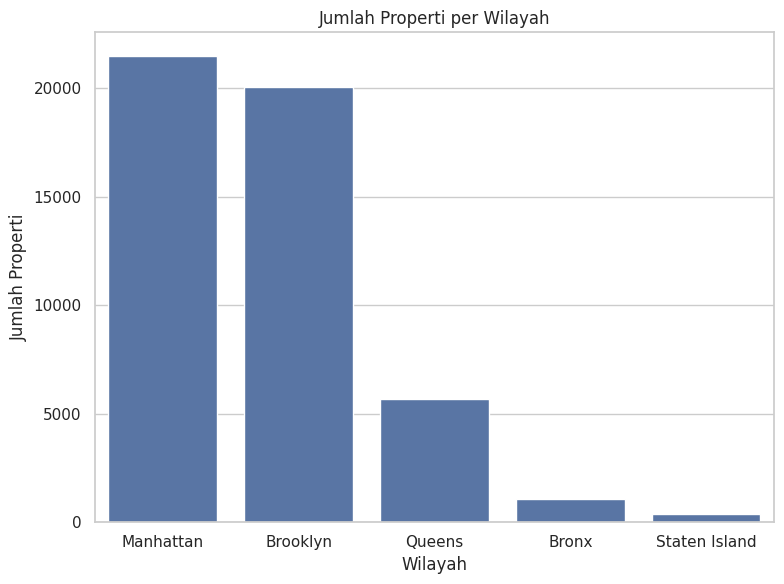

In [ ]:
# Jumlah Properti per Wilayah
plt.figure(figsize=(8,6))
sns.countplot(x='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index)
plt.title("Jumlah Properti per Wilayah")
plt.xlabel("Wilayah")
plt.ylabel("Jumlah Properti")
plt.tight_layout()
plt.show()

Harga Rata-rata per Wilayah

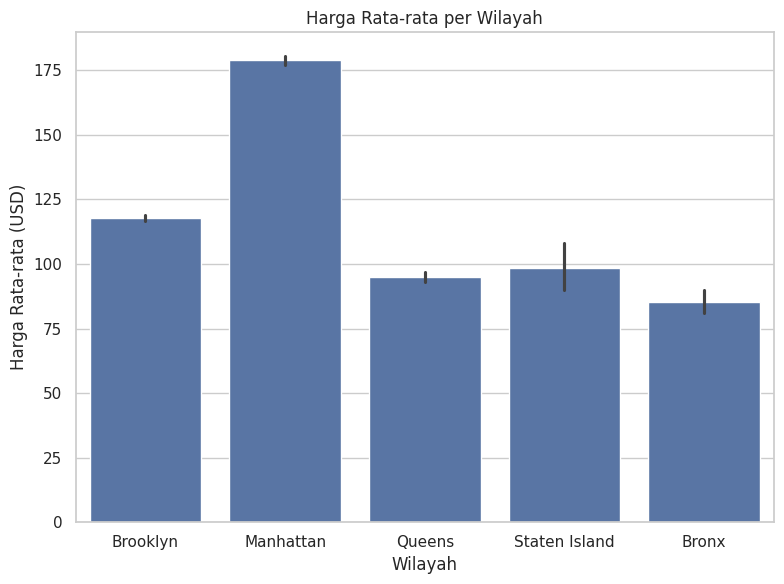

In [ ]:
# Harga Rata-rata per Wilayah
plt.figure(figsize=(8,6))
sns.barplot(x='neighbourhood_group', y='price', data=df)
plt.title("Harga Rata-rata per Wilayah")
plt.xlabel("Wilayah")
plt.ylabel("Harga Rata-rata (USD)")
plt.tight_layout()
plt.show()

Ketersediaan vs Harga

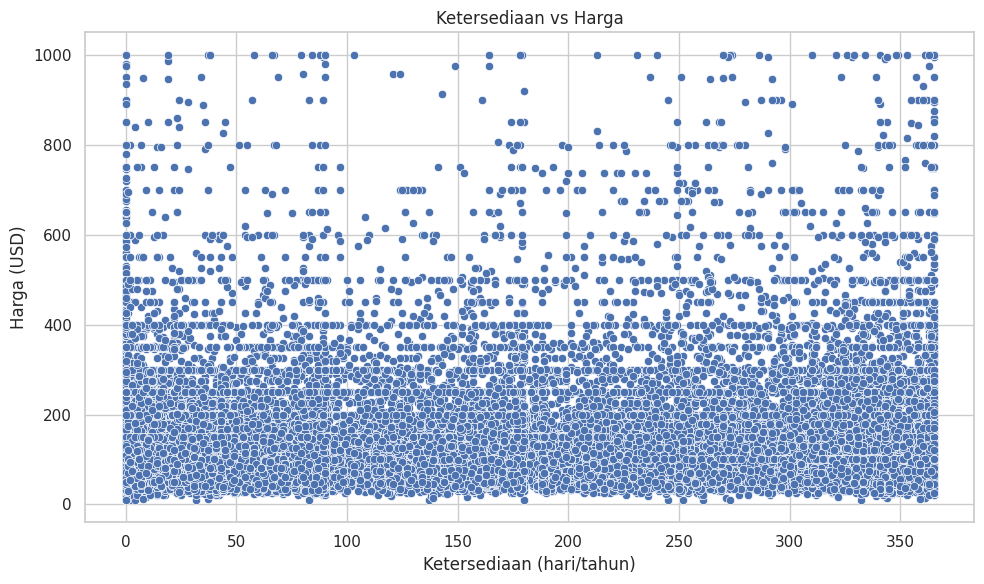

In [ ]:
# Ketersediaan vs Harga
plt.figure(figsize=(10,6))
sns.scatterplot(x='availability_365', y='price', data=df)
plt.title("Ketersediaan vs Harga")
plt.xlabel("Ketersediaan (hari/tahun)")
plt.ylabel("Harga (USD)")
plt.tight_layout()
plt.show()

Pie Chart Kategori Harga

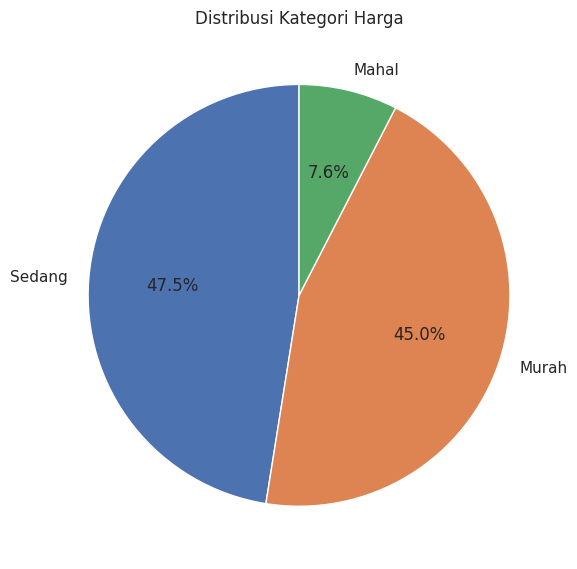

In [ ]:
# Pie Chart Kategori Harga
plt.figure(figsize=(6,6))
df['kategori_harga'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribusi Kategori Harga")
plt.ylabel("")
plt.tight_layout()
plt.show()

## Kesimpulan
- Sebagian besar listing berada di Brooklyn.
- Harga paling umum berkisar antara $50–$200.
- Manhattan memiliki rata-rata harga tertinggi.
- Mayoritas listing tidak tersedia sepanjang tahun.
- Mayoritas listing termasuk kategori harga 'Murah' dan 'Sedang'.